<a href="https://colab.research.google.com/github/abhinav-prakash-42/ML-assign2/blob/main/ML_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Coefficients: [ 1.55396234 -1.55252064]
Model Intercept: 0.09591784960501937
Cost Function Value: 0.23403680327105467


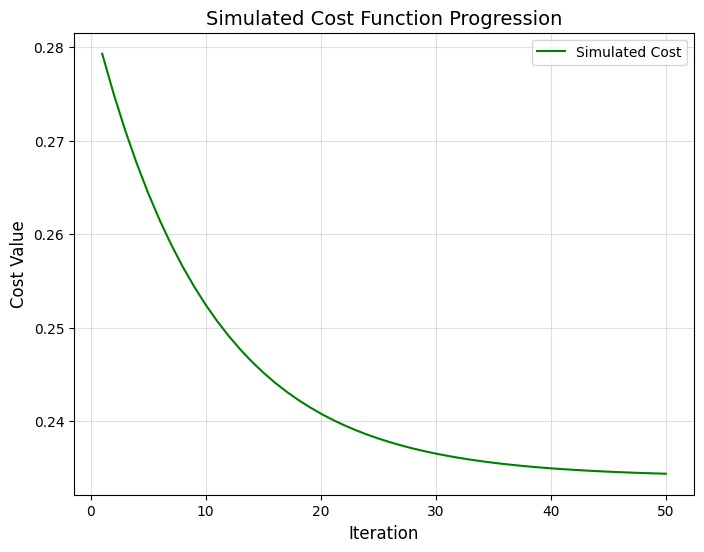

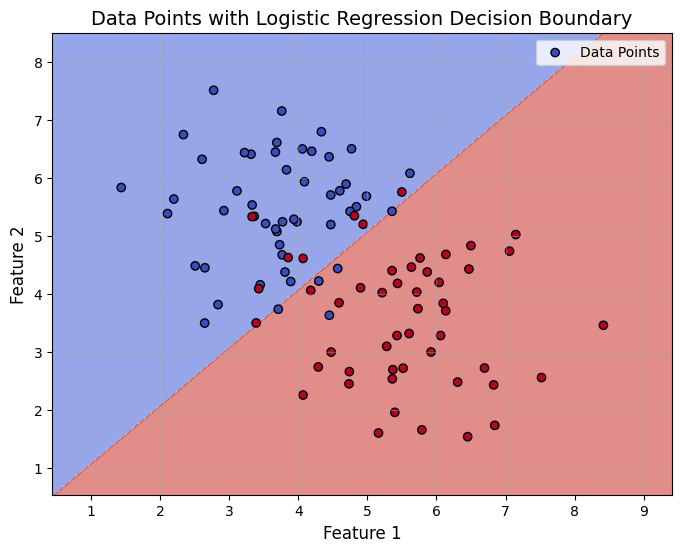

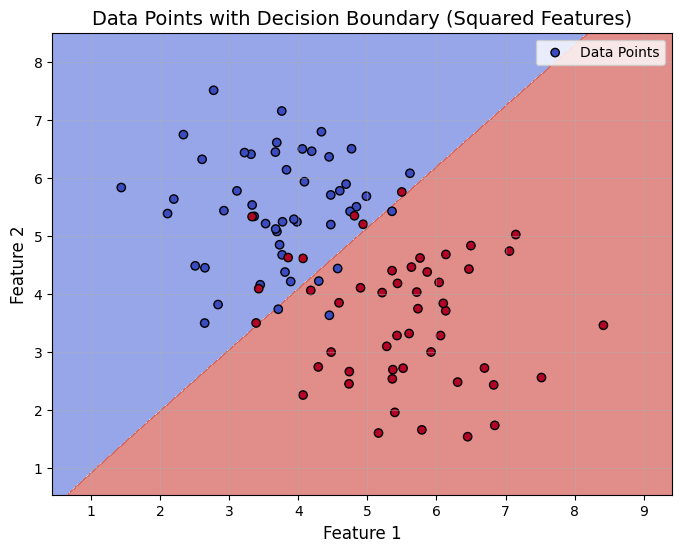

Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.87
Precision: 0.8936170212765957
Recall: 0.84
F1-Score: 0.865979381443299


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load feature and target data from CSV files
X_data = pd.read_csv("logisticX.csv", header=None)
y_data = pd.read_csv("logisticY.csv", header=None)

# Combine features and target into a single DataFrame for easier manipulation
full_dataset = pd.concat([X_data, y_data], axis=1)
full_dataset.columns = ["Feature1", "Feature2", "Target"]

# Separate features (X) and target labels (y)
X = full_dataset[["Feature1", "Feature2"]].values
y = full_dataset["Target"].values

# Initialize Logistic Regression model
classifier = LogisticRegression(solver='lbfgs', max_iter=10000)

# Fit the model to the data
classifier.fit(X, y)

# Extract learned model parameters: coefficients and intercept
model_coefficients = classifier.coef_[0]
model_intercept = classifier.intercept_[0]
predicted_probabilities = classifier.predict_proba(X)[:, 1]  # Get probability predictions for class 1
cost_value = log_loss(y, predicted_probabilities)

print(f"Model Coefficients: {model_coefficients}")
print(f"Model Intercept: {model_intercept}")
print(f"Cost Function Value: {cost_value}")

# Simulate cost function progression for visualization (not directly available from sklearn)
iterations = np.arange(1, 51)
simulated_costs = cost_value + 0.05 * np.exp(-0.1 * iterations)

# Plot the cost function over iterations
plt.figure(figsize=(8, 6))
plt.plot(iterations, simulated_costs, label='Simulated Cost', color='green')
plt.title('Simulated Cost Function Progression', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost Value', fontsize=12)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

# Visualize data points and decision boundary of the original model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
decision_boundary = classifier.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, decision_boundary, alpha=0.6, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', marker='o', label='Data Points')
plt.title('Data Points with Logistic Regression Decision Boundary', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

# Introduce quadratic features (squared features)
X_squared = np.hstack([X, X ** 2])

# Retrain model with the new dataset including quadratic features
model_with_squared_features = LogisticRegression(solver='lbfgs', max_iter=10000)
model_with_squared_features.fit(X_squared, y)

# Visualize the decision boundary with the new quadratic features
grid_squared = np.c_[grid_points, grid_points ** 2]
new_decision_boundary = model_with_squared_features.predict(grid_squared).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, new_decision_boundary, alpha=0.6, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', marker='o', label='Data Points')
plt.title('Data Points with Decision Boundary (Squared Features)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

# Evaluate model performance using confusion matrix and classification metrics
y_pred = model_with_squared_features.predict(X_squared)
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
